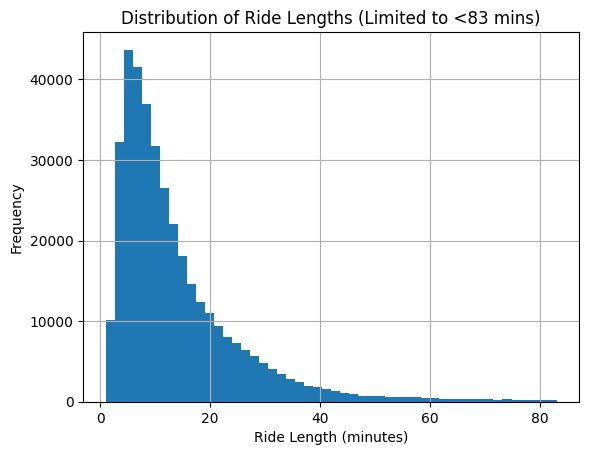

(count    378866.000000
 mean         15.549234
 std          18.688394
 min           1.016667
 25%           6.266667
 50%          10.466667
 75%          18.216667
 max         359.900000
 Name: ride_length_minutes, dtype: float64,
 member_casual
 casual    32.011425
 member    11.736526
 Name: ride_length_minutes, dtype: float64,
 member_casual
 casual    21.950000
 member     9.183333
 Name: ride_length_minutes, dtype: float64,
 member_casual  day_of_week
 casual         Friday         28.410452
                Monday         32.988117
                Saturday       33.729302
                Sunday         35.846256
                Thursday       28.892070
                Tuesday        30.263614
                Wednesday      27.933618
 member         Friday         11.124825
                Monday         11.676315
                Saturday       12.749654
                Sunday         13.338609
                Thursday       11.357209
                Tuesday        11.772599
 

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

# Load data, ensuring correct dtype handling
df_combined = pd.read_csv('Cyclistic_Cleaned_Data.csv', low_memory=False)

# Convert 'ride_length' column to numeric (in case of mixed types)
df_combined['ride_length'] = pd.to_numeric(df_combined['ride_length'], errors='coerce')

# Remove Negative Ride Lengths
df_combined = df_combined[df_combined['ride_length'] > 0]

# Remove Unrealistic Outliers (greater than 6 hours)
df_combined = df_combined[df_combined['ride_length'] < 21600]

# Convert Seconds to Minutes
df_combined.loc[:, 'ride_length_minutes'] = df_combined['ride_length'] / 60

# Plot Histogram of Ride Lengths (Limited to <83 mins)
df_combined[df_combined['ride_length_minutes'] < 83]['ride_length_minutes'].hist(bins=50)
plt.xlabel('Ride Length (minutes)')
plt.ylabel('Frequency')
plt.title('Distribution of Ride Lengths (Limited to <83 mins)')
plt.show()

# Analyze Ride Patterns
summary_stats = df_combined['ride_length_minutes'].describe()
mean_by_type = df_combined.groupby('member_casual')['ride_length_minutes'].mean()
median_by_type = df_combined.groupby('member_casual')['ride_length_minutes'].median()
mean_by_type_weekday = df_combined.groupby(['member_casual', 'day_of_week'])['ride_length_minutes'].mean()

# Export Processed Data
df_combined.to_csv('Cyclistic_Cleaned_Processed.csv', index=False)

# Display results
summary_stats, mean_by_type, median_by_type, mean_by_type_weekday
